# Gráfico Produto Interno Bruto 
Valor adicional bruto - VAB a preços básicos na indústria

In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Cidades
cidades = ["Londrina", "Ibiporã", "Cambé", "Rolândia", "Arapongas", "Apucarana", "Cambira", "Jandaia do Sul", "Mandaguari", "Marialva", "Sarandi", "Maringá"]

# Extensão cobertura industrial DINOv2 ViTL14 LoRA
ind_ext = [20.51, 3.32, 5.86, 4.79, 9.72, 7.64, 0.25, 1.60, 2.76, 2.84, 2.65, 23.32]

# Fragmentação da mancha industrial e, razão das ademais extensões
frag_ind=[17.8153, 18.7333, 18.0494, 17.1340, 17.0957, 19.9109, 21.7538, 19.3641, 18.1150, 20.4997, 18.7671, 16.7348]
razao_circ = [0.7819, 1.9425, 1.4632, 1.6174, 1.1401, 1.2843, 7.0677, 2.7979, 2.1310, 2.0994, 2.1738, 0.7338]
razao_frag_circ = [22.7786, 9.6454, 12.3373, 10.5952, 14.9970, 15.5043, 3.0782, 6.9224, 8.5003, 9.7653, 8.6344, 22.8103]


# Dados econômicos IPARDES 2021
pib =   [23604749.28, 3313525.53, 5030074.49, 3575090.07, 4954206.07, 3874313.56 , 280229.17, 790200.15 , 1835781.58, 2654519.88, 2072896.51, 22656732.55 ] 
pib_vab_ind = [4346594.63, 603668.42, 1303760.85, 1201524.199, 1385058.47, 834992.17, 40011.12, 142221.40, 553042.61, 775748.32 , 317353.80, 3810289.87 ] 
pib_pcapta = [40637, 59502, 46520, 52448, 39150, 28190, 35174, 37132, 53014,  73526,  20962, 51909]  

# Dados demográficos IPARDES 2024
populacao = [577318, 53054, 111009, 79935, 123863, 134910, 9899, 21851, 38050, 44098, 125785,  425983 ] 


# Energia (Mwh) IPARDES 2024
consumo_ind = [287720.651, 86281.559, 94270.219 , 271770.204, 207694.988, 135050.288, 9909.776, 14782.918, 110856.437, 53156.885, 17130.858, 398803.003] 


# Dados territoriais e outros IBGE
area_territorial = [1652.569, 294.742, 495.375, 459.024, 382.215, 556.99, 164.786, 187.6, 335.814, 475.493, 103.501, 487.026] #2024
area_urbanizada = [129.44, 18.27, 32.16, 22.59, 35.90, 39.87, 2.72, 8.51, 10.98, 14.41, 23.65, 112.70] #2019
mort_infantil = [11.81,  12.72, 10.93, 12.89,  11.50, 9.68,  14.71 , 33.06, 2.21, 12.22,  12.89, 10.82] # 2023
esgotamento = [92.22, 95.92, 94.03, 49.21, 73.92, 79.87, 14.27, 55.77,  68.48, 70.13, 43.30, 94.71 ] # 2022
idhm = [0.778, 0.726, 0.734, 0.739, 0.748, 0.748,  0.725 , 0.747, 0.751, 0.735, 0.695, 0.808] #2010


# Normalização
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


v1 = normalize(np.array(pib))
v2 = normalize(np.array(pib_vab_ind))
v3 = normalize(np.array(pib_pcapta))
v4 = normalize(np.array(area_territorial))
v5 = normalize(np.array(area_urbanizada))
v6 = normalize(np.array(populacao))
v7 = normalize(np.array(mort_infantil))
v8 = normalize(np.array(pib_vab_ind) / np.array(ind_ext))
v9 = normalize(np.array(ind_ext) / np.array(area_urbanizada))
v10 = normalize(np.array(ind_ext) / np.array(pib_pcapta))
v11 = normalize(np.array(consumo_ind))
v12 = normalize(  np.array(consumo_ind)/np.array(ind_ext))

# Função para criar e plotar a spline cúbica
def plot_spline(x, y, label, color):
    spline = interp1d(np.arange(len(x)), y, kind='cubic')
    smooth_x = np.linspace(0, len(x) - 1, 300)
    smooth_y = spline(smooth_x)
    plt.plot(smooth_x, smooth_y, label=label, linestyle='--', color=color)




/var/folders/5z/5t77xq511rx6jf39mc48mzx40000gn/T/ipykernel_81144/726641385.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


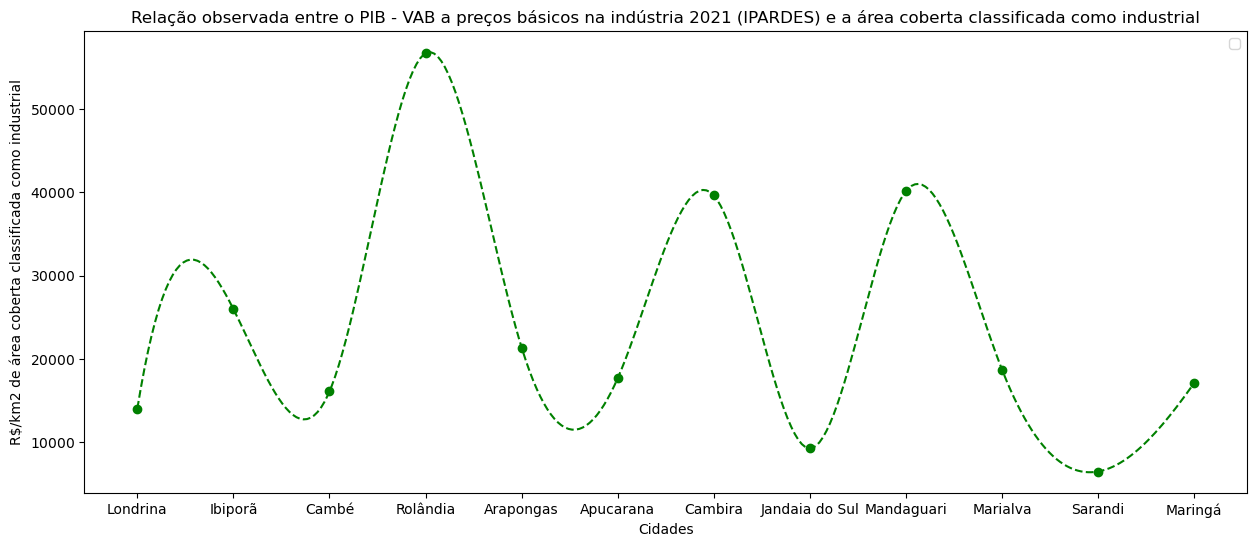

In [2]:
# Criando o gráfico
plt.figure(figsize=(15, 6))

# Adicionando os pontos no gráfico
plt.scatter(cidades,  np.array(consumo_ind)/np.array(ind_ext) , label='', color='green')


# Plotando as splines cúbicas
plot_spline(cidades, np.array(consumo_ind)/np.array(ind_ext), '', 'green')

# Adicionando legendas e título
plt.xlabel('Cidades')
plt.ylabel('R$/km2 de área coberta classificada como industrial')
plt.title('Relação observada entre o PIB - VAB a preços básicos na indústria 2021 (IPARDES) e a área coberta classificada como industrial')
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y', scilimits=(0,25000))


# Exibindo o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


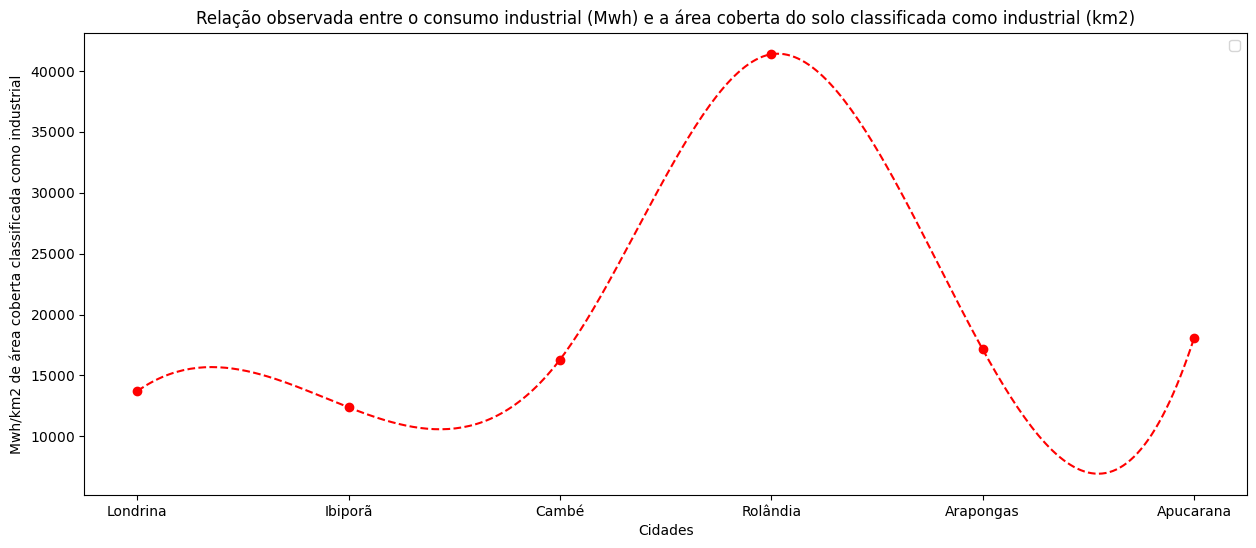

In [44]:
# Criando o gráfico
plt.figure(figsize=(15, 6))

plt.scatter(cidades, np.array(consumo_ind)/np.array(industrial), label='', color='red')
plot_spline(cidades, (np.array(consumo_ind)/np.array(industrial)), '', 'red')


# Adicionando legendas e título
plt.xlabel('Cidades')
plt.ylabel('Mwh/km2 de área coberta classificada como industrial')
plt.title('Relação observada entre o consumo industrial (Mwh) e a área coberta do solo classificada como industrial (km2)')
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y', scilimits=(0,25000))


# Exibindo o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


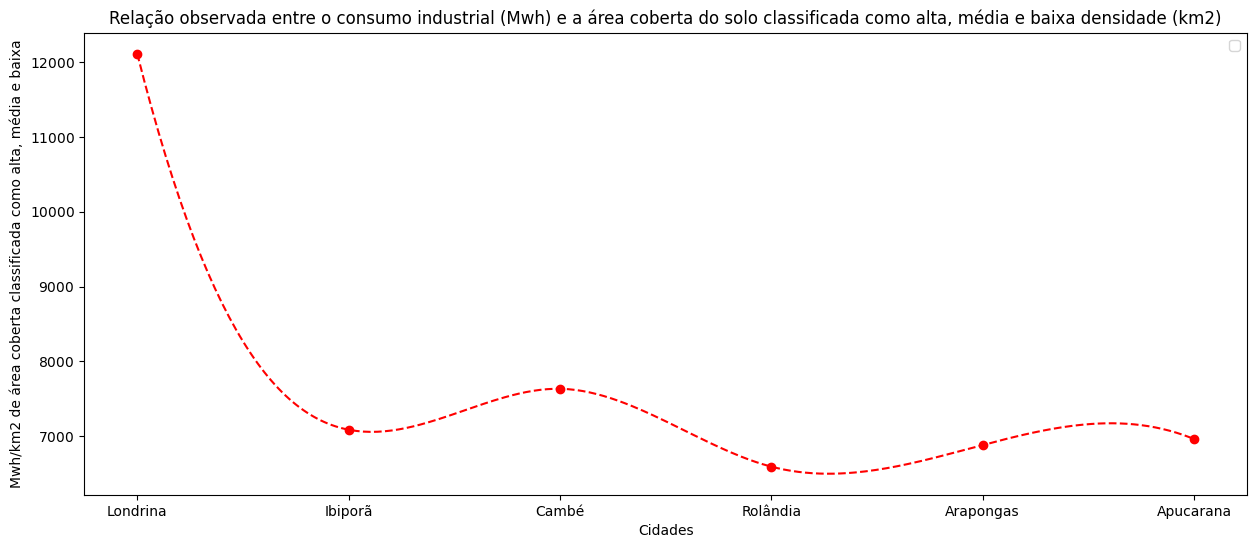

In [47]:
# Criando o gráfico
plt.figure(figsize=(15, 6))

plt.scatter(cidades, (  np.array(consumo_urbano)/(np.array(hduf)+np.array(mduf)+np.array(lduf))   )  , label='', color='red')
plot_spline(cidades, ( np.array(consumo_urbano)/(np.array(hduf)+np.array(mduf)+np.array(lduf)) ), '', 'red')


# Adicionando legendas e título
plt.xlabel('Cidades')
plt.ylabel('Mwh/km2 de área coberta classificada como alta, média e baixa')
plt.title('Relação observada entre o consumo industrial (Mwh) e a área coberta do solo classificada como alta, média e baixa densidade (km2)')
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y', scilimits=(0,25000))


# Exibindo o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


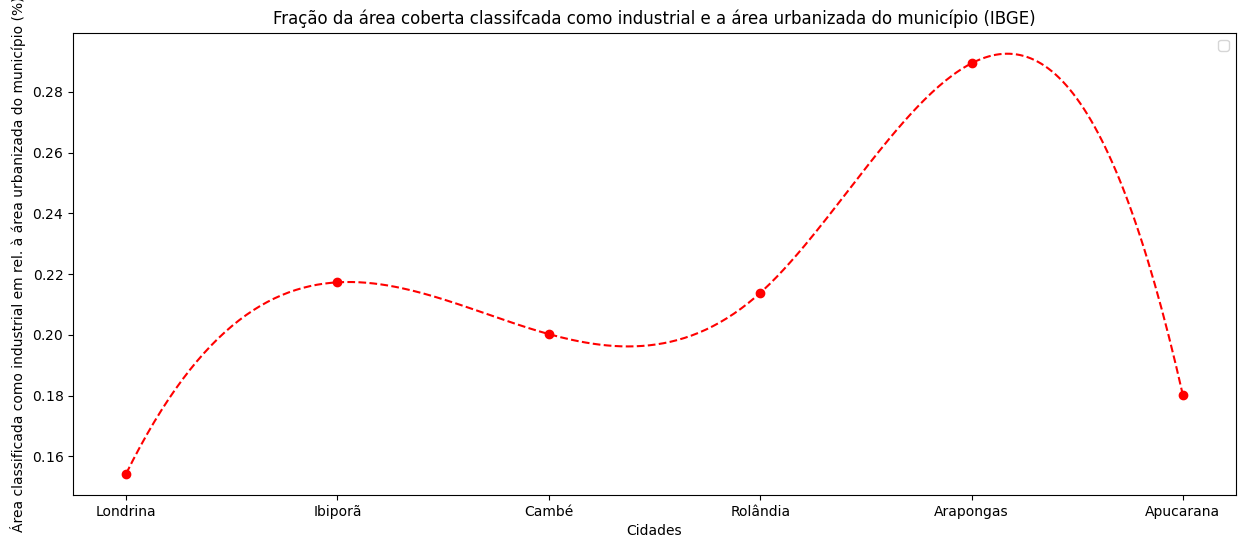

In [48]:
# Criando o gráfico
plt.figure(figsize=(15, 6))
plt.scatter(cidades, (np.array(industrial) / np.array(area_urbanizada)), color='red')


# Plotando as splines cúbicas
plot_spline(cidades, (np.array(industrial) / np.array(area_urbanizada)), '', 'red')


# Adicionando legendas e título
plt.xlabel('Cidades')
plt.ylabel('Área classificada como industrial em rel. à área urbanizada do município (%)')
plt.title('Fração da área coberta classifcada como industrial e a área urbanizada do município (IBGE)')
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y', scilimits=(0,25000))


# Exibindo o gráfico
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dados fornecidos IPARDE - 2021
data = {
    'Cidades': ["Londrina", "Ibiporã", "Cambé", "Rolândia", "Arapongas", "Apucarana"],
    'PIB 2021': [20565300.155, 2684935.532, 4230894.299, 3148719.279, 4318156.416, 3456693.149],
    'PIB_VAB 2021': [4346594.630, 603668.415, 1303760.849, 1201524.199, 1385058.466, 834992.174],
    # 'PIB PER CAPTA 2021 ' : [40636.89, 59501.61, 46520.49, 52447.59, 39149.76, 28189.54 ], #IBGE 2021 
    'Área_Territorial': [1649.846, 298.492, 497.747, 454.174, 382.556, 557.043],
    'Área_Urbanizada': [129.44, 18.27, 32.16, 22.59, 35.90, 39.87],
    # 'População 2022 ': [555965, 51603, 107208, 71670, 119138, 130134 ], # IBGE 2022 
    # 'Mort. infantil 2022 ': [11.77, 12.78, 7.93, 15.92, 4.61, 13.82], # IBGE 2022
    # 'Esg. sanit. 2010 (%) ': [85.2, 97.2, 78, 48.9, 57.8, 41.6] ,# IBGE 2010???
    # 'IDH 2010' : [0.778, 0.726,  0.734, 0.739, 0.748, 0.748 ], #IBGE 2010???
    'HDUF': [4.18, 0.00, 0.16, 0.02, 0.35, 0.68],
    'Industrial': [19.78, 3.97, 6.44, 4.83, 10.39, 7.18],
    'MDUF': [35.8, 1.78, 9.67, 4.79, 7.6, 8.46 ],
    'LDUF' : [55.51, 9.95, 12.27, 10.03, 17.59, 18.24 ],
    # 'BARE': [11.21, 1.52, 5.57, 2.09, 4.57, 4.31 ],
    # 'GRASS': [11.86, 7.83, 2.58, 4.39, 17.44, 8.87  ],
    # 'BUSH': [10.33, 2.62, 2.25, 1.09, 1.65, 4.43 ],
    # 'CROPS': [38.77, 12.44, 26.52, 13.35, 55.88, 37.12  ],
    # 'TREES': [30.06, 6.50, 4.79, 4.22, 11.72, 18.17 ],
    # 'WATER': [1.96, 0.02, 0.48 , 0.26, 0.35, 0.6 ],
    # 'CONS. RES. 2022': [481777.167,  40900.764, 85615.474, 52890.425, 90148.484, 97466.030], #IPARDES 2022
    'CONS. IND. 2022': [273733.095, 49131.686, 104940.208, 199820.030, 178032.945, 129680.332], #IPARDES 2022
    'CONS. URB. 2022': [1120021.736, 83103.976, 168670.161, 97802.619, 175712.211 , 190569.472]  #IPARDES 2022   
      
}

df = pd.DataFrame(data)

# Excluindo a coluna "Cidades" para calcular a matriz de correlação
numeric_df = df.drop(columns=['Cidades'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre algumas Variáveis')
plt.show()



In [ ]:
# Plotando gráficos de dispersão para algumas relações significativas
plt.figure(figsize=(14, 10))

# PIB vs População
plt.subplot(2, 2, 1)
plt.scatter(df['População'], df['PIB'], color='blue')
plt.title('PIB vs População')
plt.xlabel('População')
plt.ylabel('PIB')

# PIB_VAB vs Industrial
plt.subplot(2, 2, 2)
plt.scatter(df['Industrial'], df['PIB_VAB'], color='red')
plt.title('PIB_VAB vs Cobertura Industrial')
plt.xlabel('Cobertura Industrial')
plt.ylabel('PIB_VAB')

# População vs HDUF
plt.subplot(2, 2, 3)
plt.scatter(df['População'], df['HDUF'], color='green')
plt.title('População vs HDUF')
plt.xlabel('População')
plt.ylabel('HDUF')

# Área Urbanizada vs Industrial
plt.subplot(2, 2, 4)
plt.scatter(df['Área_Urbanizada'], df['Industrial'], color='purple')
plt.title('Área Urbanizada vs Cobertura Industrial')
plt.xlabel('Área Urbanizada')
plt.ylabel('Cobertura Industrial')

plt.tight_layout()
plt.show()


# OS DADOS BAIXO SÃO DO ARTIGO